<a href="https://colab.research.google.com/github/projna/Comparative-Analysis-of-Food-Security-Indicators/blob/main/Comparative_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparative Analysis of Food Security Indicators Across Canada Using Ontologies**

In [ ]:
#To stop python warnings, we have installed shutup
!pip install shutup
#Owlready2 is a module for ontology-oriented programming in Python 3. It can manage ontologies and knwoledge graphs, and includes an optimized RDF/OWL quadstore.
!pip install owlready2
!pip install pyvis
from pyvis.network import Network
from IPython.core.display import display, HTML
import networkx as nx
from owlready2 import *
from posixpath import split
import matplotlib.pyplot as plt
from networkx.algorithms import isomorphism
import pandas as pd
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.8 MB 1.6 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.37-cp37-cp37m-linux_x86_64.whl size=20445997 sha256=0b25b93dbcb9a54f609fbec522ecdef181697e5cc4b6a01e0a0d54ef0cbaca75
  Stored in directory: /root/.cache/pip/wheels/34/49/36/31062d59333455aa0cb4950141cab4945600ce61c26a44e9cd
Successfully built owlready2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=4e17ed718796a9f0dde9f591a77e4c252ba3eec93917714fa574f56dbf3dbd1f
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis


**Loading Food Ontology**

In [ ]:
# onto = get_ontology("/content/spo-food.owl")
onto=get_ontology("https://indicatorcomparision.pythonanywhere.com/downloadowl")
onto.load()

* Owlready2 * WARNING: DataProperty http://www.w3.org/2006/time#hasXSDDuration belongs to more than one entity types: [owl.AnnotationProperty, owl.DatatypeProperty, Time.TimeOntologyDataProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/spo/spo-food#amountProvidedBy belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, downloadowl.spoObjectProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/spo/spo-food#defined_by belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, downloadowl.populationProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/spo/spo-food#distributedFor belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, downloadowl.spoObjectProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/spo/spo-food#dis

get_ontology("http://www.semanticweb.org/spo/spo-food#")

**Extracting the baseurl**

In [ ]:
baseurl=onto.get_base_iri()
baseurl=baseurl.split('#')[0]
baseurl

'http://www.semanticweb.org/spo/spo-food'

**Comparative Analysis**
Taking two indicators to compare the analysis:

Indicator List:

1. Percentage of people in food insecurity group
2. Number of people who came to our free breakfast programs 
3. Number of children fed
4. Number of food hampers distributed in a month
5. How many families attending food programs to learn to cook
6. Number of meals served in a month
7. People taught in Community Kitchens annually
8. Number of students taught through the school garden program annually
9. Value of food grown in community gardens
10. Proceeds from produce purchased from the farm
11. Value of funds paid to farmers
12. Number of acres providing ecosystem services
13. Increase in number of acres dedicated to program year to year
14. Number of local food deliveries per region
15. Number of seeds distributed to community garden members
16. Number of community gardens in city and county


In [ ]:
indicatorlist=['',
               'Percentage of people in food insecurity group',
               'Number of people who came to our free breakfast programs',
               'Number of children fed',
               'Number of food hampers distributed in a month',
               'How many families attending food programs to learn to cook',
               'Number of meals served in a month',
               'People taught in Community Kitchens annually',
               'Number of students taught through the school garden program annually',
               'Value of food grown in community gardens',
               'Proceeds from produce purchased from the farm',
               'Value of funds paid to farmers',
               'Increase in number of acres dedicated to program year to year',
               'Number of local food deliveries per region',
               'Number of seeds distributed to community garden members',
               'Number of community gardens in city and county']

**Indicator Input**

In [ ]:
# indicator1 = input("Enter first indicator: ")
# indicator2 = input("Enter second indicator: ")
indicator1=indicatorlist[1]
indicator2=indicatorlist[2]

**Searching the inputs in the ontology**

In [ ]:
if(onto.search(comment = indicator1)):
  indicator1Class = onto.search(comment = indicator1)
  print(indicator1Class)
if(onto.search(comment = indicator2)):
  indicator2Class = onto.search(comment = indicator2)
  print(indicator2Class)
else:
  print("Not found")


[downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group]
[downloadowl.Spo_2_Number_Of_People_Who_Came_To_Our_Free_Breakfast_Programs]


**If found, extract all the information associated with the given indicator** 

In [ ]:
for i in indicator1Class[0].is_a: print(i)
for i in indicator2Class[0].is_a: print(i)

iso21972.RatioIndicator
downloadowl.SPO_1
iso21972.unit_of_measure.value(downloadowl.Percent)
iso21972.denominator.exactly(1, downloadowl.Country_Population)
iso21972.numerator.exactly(1, downloadowl.Spo_1_Food_Insecure_Population_Sum)
iso21972.SumIndicator
downloadowl.SPO_2
iso21972.value.only(iso21972.numerical_value.exactly(1, <class 'int'>))
iso21972.parameter_of_var.value(downloadowl.numberOfPeopleParticipatedVar)
iso21972.unit_of_measure.value(iso21972.population_cardinality_unit)
govstat.sum_of.exactly(1, downloadowl.Spo_2_Participants_Of_Free_Breakfast_Program_Population)


**Creating two graphs from given indicators**

In [ ]:
# Storing the class properties and cardinality of Indicator 1
final1Graph=[]
startingnodeForindicator1=""
startingnodeForindicator2=""
# Storing the class properties and cardinality of Indicator 2
final2Graph=[]
# This is the method for creating the list of properties classes and cardinality of indicators
def graphlist(classname,finalGraph):
  for i in classname.is_a:
    if(type(i)==owlready2.class_construct.Restriction):
      tempgraph=[]
      tempgraph.append(classname)
      tempgraph.append(i.property)
      tempgraph.append(i.cardinality)
      tempgraph.append(i.value)
      tempgraph.append(classname)
      finalGraph.append(tempgraph)
      if(type(i.value)==owlready2.entity.ThingClass):
        temp_iri=i.value.iri.split('#')
        if(temp_iri[0]==baseurl):
          graphlist(i.value,finalGraph)
    else:
      tempgraph=[]
      tempgraph.append(classname)
      tempgraph.append("subClassOf")
      tempgraph.append("NaN")
      tempgraph.append(i)
      tempgraph.append(classname)
      finalGraph.append(tempgraph)

# Calling the function for both indicators
graphlist(indicator1Class[0],final1Graph)
graphlist(indicator2Class[0],final2Graph)
#Printing the list of both indicators
for graph in final1Graph:
  print(graph)
for graph in final2Graph:
  print(graph)

for graph in final1Graph:
  startingnodeForindicator1=graph[0]
  break
for graph in final2Graph:
  startingnodeForindicator2=graph[0]
  break



[downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group, 'subClassOf', 'NaN', iso21972.RatioIndicator, downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group]
[downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group, 'subClassOf', 'NaN', downloadowl.SPO_1, downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group]
[downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group, iso21972.unit_of_measure, None, downloadowl.Percent, downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group]
[downloadowl.Percent, 'subClassOf', 'NaN', iso21972.Cardinality_unit, downloadowl.Percent]
[downloadowl.Percent, 'subClassOf', 'NaN', downloadowl.SPOThing, downloadowl.Percent]
[downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group, iso21972.denominator, 1, downloadowl.Country_Population, downloadowl.Spo_1_Percentage_Of_People_In_Food_Insecurity_Group]
[downloadowl.Country_Population, 'subClassOf', 'NaN', govstat.Population, downloadowl.Country_Populatio

**Drawing two graphs**

In [ ]:
def drawGraph(finalGraph,output,size,layout):
  counter=0
  net=Network('700px', '1100px',directed =True)
  plt.figure(figsize=(size,size))
  G = nx.DiGraph()
  edge_lables={}
  for lists in finalGraph:
    if(not G.has_node(lists[0])):
      G.add_node(lists[0])
      net.add_node(str(lists[0]),label=str(lists[0]))
      counter=counter+1
    if(not G.has_node(lists[3])):
      G.add_node(lists[3])
      net.add_node(str(lists[3]),label=str(lists[3]))
      counter=counter+1
    if(not G.has_edge(lists[0],lists[3])):
      G.add_edge(lists[0],lists[3],label=lists[1])
      net.add_edge(str(lists[0]),str(lists[3]),label=str(lists[1]))
  if(layout=='planar_layout'):
    pos=nx.spectral_layout(G)
  else:
    pos=nx.circular_layout(G)
  
  net.toggle_physics(True)
  net.show_buttons(filter_=['physics'])
  net.show(output+'.html')
  display(HTML(output+'.html'))
  return G


In [ ]:
# First Indicator Graph
firstindicatorGraph=drawGraph(final1Graph,"Indicator1",18,'')


<Figure size 1296x1296 with 0 Axes>

In [ ]:
## Second Indicator Graph
secondindicatorGraph=drawGraph(final2Graph,"Indicator2",18,'')

<Figure size 1296x1296 with 0 Axes>

**Graph Analysis**

In [ ]:
#Creating Dataframe
data={
    'Indicators':['spo_1','spo_2','spo_3','spo_4','spo_5','spo_6','spo_7','spo_8','spo_9','spo_10','spo_11','spo_12','spo_13','spo_14','spo_15','spo_17'],
    'Number_of_Nodes':[25,17,14,17,13,15,21,12,17,13,16,13,22,16,22,19],
    'Number_of_Edges':[34,18,15,19,14,17,28,12,21,18,16,13,37,16,29,31]
}
df = pd.DataFrame(data)
print(df)


   Indicators  Number_of_Nodes  Number_of_Edges
0       spo_1               25               34
1       spo_2               17               18
2       spo_3               14               15
3       spo_4               17               19
4       spo_5               13               14
5       spo_6               15               17
6       spo_7               21               28
7       spo_8               12               12
8       spo_9               17               21
9      spo_10               13               18
10     spo_11               16               16
11     spo_12               13               13
12     spo_13               22               37
13     spo_14               16               16
14     spo_15               22               29
15     spo_17               19               31


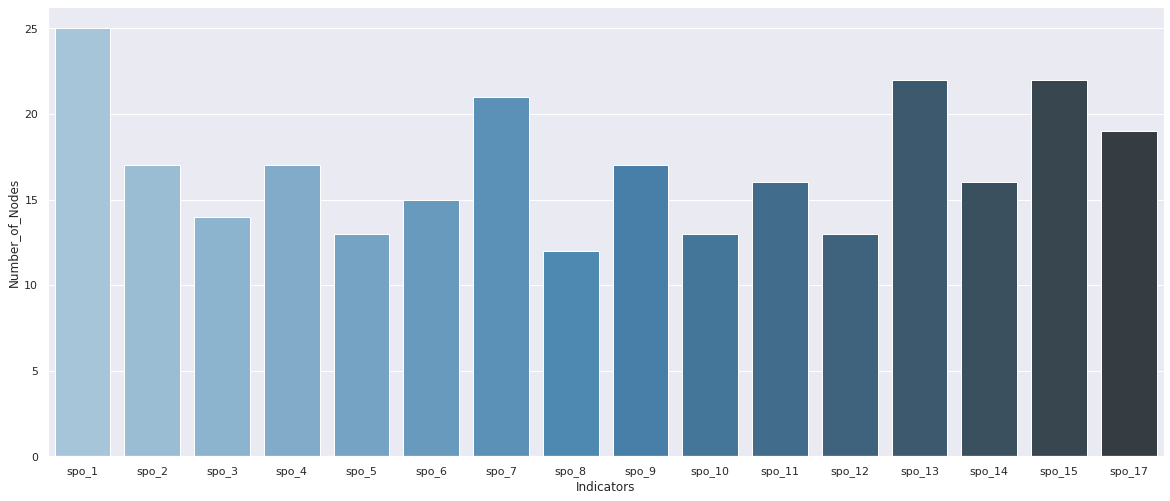

In [ ]:
#Number of Nodes
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.barplot(x="Indicators", y="Number_of_Nodes", data=df,palette="Blues_d")


**VF2 Graph Isomorphism**

In [ ]:
GM = isomorphism.DiGraphMatcher(firstindicatorGraph, secondindicatorGraph)
print("Graph Isomorphism Test: "+str(GM.is_isomorphic()))
print("Is the subgraph isomorphic in any way? Ans:"+str(GM.subgraph_is_isomorphic())+"\n")
print("Display the subgraph mapping" )
for ls in GM.mapping:
  print(str(ls)+"=>"+str(GM.mapping.get(ls)))

Graph Isomorphism Test: False
Is the subgraph isomorphic in any way? Ans:False

Display the subgraph mapping


In [ ]:
def uniquePropertylist(listisubgraph):
  propertylist=[]
  for lists in listisubgraph:
    propertylist.append(lists[1])
  propertydict={}
  for item in propertylist:
    propertydict[item]=propertydict.get(item, 0) + 1
  return propertydict

Comparison Category:
1. Indicator Type Comparison: Check that the two indicators, SumIndicator   and RatioIndicator, have the same structure.
2. Population: Whether both indicators have the same population, different or subsets of each other.
3. Indicator Quantity: Checking if both indicators Quantity and its Measure must refer to the same unit of measure.
4. Time Equality: Checking if both indicators are using same time interval i.e.,iso21972:for_time_interval.

There are four types of Indicators.

1.   Indicator
2.   SumIndicator
3.   RatioIndicator
4.   DifferenceIndicator


#Category 1: Indicator Type Comparision

In [ ]:
def SubGraphForType(finalgraph):
  Indicator1Node=""
  IndicatorSubclass=""
  Indicator1typelist=[]
  for lists in finalgraph:
    if 'RatioIndicator' in str(lists[3]) or 'Indicator' in str(lists[3]) or 'SumIndicator' in str(lists[3]) or 'DifferenceIndicator' in str(lists[3]) :
      IndicatorSubclass=lists[3]
      Indicator1Node=lists[0]
      break
  for lists in finalgraph:
    if(str(lists[0])==str(Indicator1Node)):
      Indicator1typelist.append(lists)
  return Indicator1Node,Indicator1typelist,IndicatorSubclass



In [ ]:
Indicator1Node=""
Indicator1TypeSubclass=""
Indicator1typelist=[]
Indicator2Node=""
Indicator2TypeSubclass=""
Indicator2typelist=[]
Indicator1Node,Indicator1typelist,Indicator1TypeSubclass=SubGraphForType(final1Graph)
Indicator2Node,Indicator2typelist,Indicator2TypeSubclass=SubGraphForType(final2Graph)


In [ ]:
IndicatorType1SubGraph=drawGraph(Indicator1typelist,'IndicatorType1Subgraph',8,'')

<Figure size 576x576 with 0 Axes>

In [ ]:
IndicatorType2SubGraph=drawGraph(Indicator2typelist,'IndicatorType2Subgraph',8,'')

<Figure size 576x576 with 0 Axes>

In [ ]:
GM = isomorphism.DiGraphMatcher(IndicatorType1SubGraph, IndicatorType2SubGraph)
print("The Graph is Isomorphic or not?")
print(GM.is_isomorphic())
if(GM.is_isomorphic()):
  if(Indicator2TypeSubclass==Indicator1TypeSubclass):
    print("Both Indicator type are the same.")
    print(Indicator1TypeSubclass.get_iri(Indicator1TypeSubclass))
  else:
    print("Indicator 1 : "+Indicator1TypeSubclass.get_iri(Indicator1TypeSubclass))
    print("Indicator 2 : "+Indicator2TypeSubclass.get_iri(Indicator2TypeSubclass))
else:
  print("Indicator 1 : "+Indicator1TypeSubclass.get_iri(Indicator1TypeSubclass))
  print("Indicator 2 : "+Indicator2TypeSubclass.get_iri(Indicator2TypeSubclass))


The Graph is Isomorphic or not?
False
Indicator 1 : http://ontology.eil.utoronto.ca/ISO21972/iso21972#RatioIndicator
Indicator 2 : http://ontology.eil.utoronto.ca/ISO21972/iso21972#SumIndicator


**Subgraph Isomorphism Test(Indicator Type)**

In [ ]:
print("Number of Edges of indicator1subgraph:  "+str(IndicatorType1SubGraph.number_of_edges()))
print("Number of Vertices of indicator1subgraph:  "+str(IndicatorType1SubGraph.number_of_nodes()))
print("Number of Edges of indicator2subgraph: "+str(IndicatorType2SubGraph.number_of_edges()))
print("Number of Vertices of indicator2subgraph: "+str(IndicatorType2SubGraph.number_of_nodes()))


Number of Edges of indicator1subgraph:  5
Number of Vertices of indicator1subgraph:  6
Number of Edges of indicator2subgraph: 6
Number of Vertices of indicator2subgraph: 7


If the two indicator type is not isomorphic than print the structral difference

In [ ]:
if(GM.is_isomorphic()==False):
  propertydictforsubgraph1=uniquePropertylist(Indicator1typelist)
  print("Differences in the structure of indicator types\n")
  print("Indicator 1")
  for key in propertydictforsubgraph1:
    print(str(key)+":"+str(propertydictforsubgraph1[key]))
  print("\n")
  propertydictforsubgraph2=uniquePropertylist(Indicator2typelist)
  print("Indicator 2")
  for key in propertydictforsubgraph2:
    print(str(key)+":"+str(propertydictforsubgraph2[key]))

Differences in the structure of indicator types

Indicator 1
subClassOf:2
iso21972.unit_of_measure:1
iso21972.denominator:1
iso21972.numerator:1


Indicator 2
subClassOf:2
iso21972.value:1
iso21972.parameter_of_var:1
iso21972.unit_of_measure:1
govstat.sum_of:1


If the graph is isomorphic then it will return mapping list

In [ ]:
if(GM.is_isomorphic()==True):
  GM.mapping

#Category 2 : Population Wise Comparision

In [ ]:
def SubGraphForPopulation(finalgraph,graph):
  Indicator1Node=""
  IndicatorDefinion=""
  Indicator1typelist=[]
  IndicatorPopulationdefinition=""
  Indicatordefintion=""
  for lists in finalgraph:
    if 'govstat.Population' in str(lists[3]):
      Indicator1Node=lists[0]
  for lists in finalgraph:
    if(str(lists[0])==str(Indicator1Node)):
      Indicator1typelist.append(lists)
      if(str(lists[1])=="iso21972.defined_by"):
        templist=list(graph.out_edges(lists[3]))
        print(templist[0][0])
        temps=[templist[0][0],"subClassOf","Nan",templist[0][1],templist[0][0]]
        Indicator1typelist.append(temps)
        IndicatorPopulationdefinition=templist[0][1].get_iri(templist[0][1])
  return Indicator1Node,Indicator1typelist,IndicatorPopulationdefinition



In [ ]:
Indicator1Node=""
Indicator1Populationdefinition=""
Indicator1Populationlist=[]
Indicator2Node=""
Indicator2Populationdefinition=""
Indicator2populationlist=[]

Indicator1Node,Indicator1Populationlist,Indicator1Populationdefinition=SubGraphForPopulation(final1Graph,firstindicatorGraph)
Indicator2Node,Indicator2populationlist,Indicator2Populationdefinition=SubGraphForPopulation(final2Graph,secondindicatorGraph)
if(len(Indicator1Populationlist)==0 or len(Indicator2populationlist)==0 ):
  print("This Comparision is not possible because of not present of 'population' in one of the indicators")
else:
  print("Indicator 1 : "+Indicator1Populationdefinition)
  print("Indicator 2 : "+Indicator2Populationdefinition)
  IndicatorPopulation1SubGraph=drawGraph(Indicator1Populationlist,'IndicatorPopulation1Subgraph',8,'')

downloadowl.FoodInsecurePerson
downloadowl.FreeBreakfastProgram
Indicator 1 : http://ontology.eil.utoronto.ca/cids/cids#Person
Indicator 2 : http://purl.org/dc/dcmitype/Service


<Figure size 576x576 with 0 Axes>

In [ ]:
if(len(Indicator1Populationlist)==0 or len(Indicator2populationlist)==0 ):
  print("This Comparision is not possible because of not present of 'population' in one of the indicators")
else:
  IndicatorPopulation2SubGraph=drawGraph(Indicator2populationlist,'IndicatorPopulation2Subgraph',8,'')


<Figure size 576x576 with 0 Axes>

In [ ]:
if(len(Indicator1Populationlist)==0 or len(Indicator2populationlist)==0 ):
  print("This Comparision is not possible because of not present of 'population' in one of the indicators")
else:
  GM = isomorphism.DiGraphMatcher(IndicatorPopulation1SubGraph, IndicatorPopulation2SubGraph)
  print("The Graph is Isomorphic or not?")
  print(GM.is_isomorphic())
  print("Number of Edges of indicator1subgraph:  "+str(IndicatorPopulation1SubGraph.number_of_edges()))
  print("Number of Vertices of indicator1subgraph:  "+str(IndicatorPopulation1SubGraph.number_of_nodes()))
  print("Number of Edges of indicator2subgraph: "+str(IndicatorPopulation2SubGraph.number_of_edges()))
  print("Number of Vertices of indicator2subgraph: "+str(IndicatorPopulation2SubGraph.number_of_nodes()))
  if(GM.is_isomorphic()==False):
    propertydictforsubgraph1=uniquePropertylist(Indicator1Populationlist)
    print("Differences in the structure of indicator types\n")
    print("Indicator 1")
    for key in propertydictforsubgraph1:
      print(str(key)+":"+str(propertydictforsubgraph1[key]))
    print("\n")
    propertydictforsubgraph2=uniquePropertylist(Indicator2populationlist)
    print("Indicator 2")
    for key in propertydictforsubgraph2:
      print(str(key)+":"+str(propertydictforsubgraph2[key]))
  else:
    print("\nReasons for Isomorphism")
    for item in list(GM.mapping):
      print(item)


The Graph is Isomorphic or not?
True
Number of Edges of indicator1subgraph:  5
Number of Vertices of indicator1subgraph:  6
Number of Edges of indicator2subgraph: 5
Number of Vertices of indicator2subgraph: 6

Reasons for Isomorphism
downloadowl.Spo_1_Food_Insecure_Population
govstat.Population
schema.org.Country
downloadowl.FoodInsecurePerson
cids.Person
downloadowl.SPO_1


#Category 3 :Indicator Quantity Measure Comparision

In [ ]:
def SubGraphForUnitofMeasure(finalgraph,startingnodeForindicator):
  Indicator1Node=""
  Indicator1typelist=[]
  for lists in finalgraph:
    if lists[0]==startingnodeForindicator:
      if 'unit_of_measure' in str(lists[1]):
        Indicator1typelist.append(lists)
        Indicator1Node=lists[3]
  return Indicator1Node,Indicator1typelist


In [ ]:
Indicator1Node=""
Indicator1unitofmeasurelist=[]
Indicator2Node=""
Indicator2unitofmeasurelist=[]

Indicator1Node,Indicator1unitofmeasurelist=SubGraphForUnitofMeasure(final1Graph,startingnodeForindicator1)
Indicator2Node,Indicator2unitofmeasurelist=SubGraphForUnitofMeasure(final2Graph,startingnodeForindicator2)
Mergedgraphlist=[]
for graph in Indicator1unitofmeasurelist:
  Mergedgraphlist.append(graph)
  if(str(graph[3])=='iso21972.Monetary_unit'):
    templist=[graph[3],'subClassOf','','iso21972:Singular_unit',graph[3]]
    Mergedgraphlist.append(templist)
  else:
    if(str(graph[3])=="spo-food.Percent"):
      templist=[graph[3],'instanceOf','','iso21972:Cardinality_unit',graph[3]]
    elif(str(graph[3])=="spo-food.acre"):
      templist=[graph[3],'instanceOf','','iso21972:Cardinality_unit',graph[3]]
    elif(str(graph[3])=="spo-food.pound"):
      templist=[graph[3],'instanceOf','','iso21972:Cardinality_unit',graph[3]]
    else:
      templist=[graph[3],'subClassOf','','iso21972:Cardinality_unit',graph[3]]
    Mergedgraphlist.append(templist)
    templist=['iso21972:Cardinality_unit','subClassOf','','iso21972:Singular_unit',graph[3]]
    Mergedgraphlist.append(templist)
  # print(graph[3])
for graph in Indicator2unitofmeasurelist:
  Mergedgraphlist.append(graph)
  if(str(graph[3])=='iso21972.Monetary_unit'):
    templist=[graph[3],'subClassOf','','iso21972:Singular_unit',graph[3]]
    Mergedgraphlist.append(templist)
  else:
    if(str(graph[3])=="spo-food.Percent"):
      templist=[graph[3],'instanceOf','','iso21972:Cardinality_unit',graph[3]]
    elif(str(graph[3])=="spo-food.acre"):
      templist=[graph[3],'instanceOf','','iso21972:Cardinality_unit',graph[3]]
    elif(str(graph[3])=="spo-food.pound"):
      templist=[graph[3],'instanceOf','','iso21972:Cardinality_unit',graph[3]]
    else:
      templist=[graph[3],'subClassOf','','iso21972:Cardinality_unit',graph[3]]
    Mergedgraphlist.append(templist)
    templist=['iso21972:Cardinality_unit','subClassOf','','iso21972:Singular_unit',graph[3]]
    Mergedgraphlist.append(templist)

Indicator1UnitofMeasureGraph=drawGraph(Mergedgraphlist,'Indicator1UnitofMeasureSubgraph',8,'planar_layout')
unitofmeasuresublcass1=""
unitofmeasuresublcass2=""
for graph in Indicator1unitofmeasurelist:
  if(str(graph[3])=='iso21972:Monetary_unit'):
    unitofmeasuresublcass1=graph[3]
  elif(str(graph[3])=='iso21972:population_cardinality_unit'):
    unitofmeasuresublcass1=graph[3]
  else:
    unitofmeasuresublcass1=graph[3]
for graph in Indicator2unitofmeasurelist:
  if(str(graph[3])=='iso21972.Monetary_unit'):
    unitofmeasuresublcass2=graph[3]
  elif(str(graph[3])=='iso21972.population_cardinality_unit'):
    unitofmeasuresublcass2=graph[3]
  else:
    unitofmeasuresublcass2=graph[3]
if(unitofmeasuresublcass2==unitofmeasuresublcass1):
  print("Same IRI Found: "+str(unitofmeasuresublcass1.get_iri(unitofmeasuresublcass1)))
else:
  print(type(unitofmeasuresublcass1))
  if(type(unitofmeasuresublcass1)==owlready2.entity.ThingClass):
    print("Indicator 1: "+str(unitofmeasuresublcass1.get_iri(unitofmeasuresublcass1)))
  else:
    print("Indicator 1: "+str(unitofmeasuresublcass1.get_iri()))
  if(type(unitofmeasuresublcass2)==owlready2.entity.ThingClass):
    print("Indicator 2: "+str(unitofmeasuresublcass2.get_iri(unitofmeasuresublcass2)))
  else:
    print("Indicator 2: "+str(unitofmeasuresublcass2.get_iri()))

<class 'owlready2.entity.ThingClass'>
Indicator 1: http://www.semanticweb.org/spo/spo-food#Percent
Indicator 2: http://ontology.eil.utoronto.ca/ISO21972/iso21972#population_cardinality_unit


<Figure size 576x576 with 0 Axes>

#Category 4: Comparison By Time Equality

In [ ]:
def SubGraphForTimeComparision(finalgraph,startingnodeForindicator):
  Indicatortimetype=""
  Indicatortimeinterval=""
  for lists in finalgraph:
    if 'time' in str(lists[1]):
        Indicatortimetype=lists[1]
        Indicatortimeinterval=lists[3]
        temp=[]
        temp.append(lists)
        break         
  return Indicatortimetype,Indicatortimeinterval,temp


In [ ]:
Indicatortimetype1=""
Indicatortimeinterval1=""
Indicatortimetype2=""
Indicatortimeinterval2=""

Indicatortimetype1,Indicatortimeinterval1,lists=SubGraphForTimeComparision(final1Graph,startingnodeForindicator1)
Indicatortimetype2,Indicatortimeinterval2,lists1=SubGraphForTimeComparision(final2Graph,startingnodeForindicator2)
finaltimegraph=[]
for i in lists:
  finaltimegraph.append(i)
for i in lists1:
  finaltimegraph.append(i)
time=drawGraph(finaltimegraph,'timeEqualityGraph',8,'planar_layout')
tempIndicatortimetype1=str(Indicatortimetype1).split('.')
tempIndicatortimetype2=str(Indicatortimetype2).split('.')
if(tempIndicatortimetype1==tempIndicatortimetype2):
  print("Same Time Type")
  print(tempIndicatortimetype1.get_iri(tempIndicatortimetype1))
else:
  print('Indicator 1: '+str(Indicatortimetype1.get_iri()))
  print('Indicator 2: '+str(Indicatortimetype2.get_iri()))


Indicator 1: http://ontology.eil.utoronto.ca/ISO21972/iso21972#for_time_interval
Indicator 2: http://www.w3.org/2006/time#year


<Figure size 576x576 with 0 Axes>